# Making plots from profiling data

In [1]:
# a stacked bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

df1=pd.read_csv("/media/sf_Projects/GPU_hackathon/timing_results.csv",index_col=0)

In [2]:
df1.index.values

array(['benchmark-populate_position_cuboid_device_opencl',
       'benchmark-init_original_position',
       'benchmark-rotate_particles_device_opencl',
       'benchmark-zero_gridcount',
       'benchmark-bin_and_count_device_opencl',
       'benchmark-prefix_sum_device_opencl',
       'benchmark-copy_celloffset_to_backup_device_opencl',
       'benchmark-insert_particles_in_bin_array_device_opencl',
       'benchmark-compute_original_density', 'benchmark-compute_density',
       'benchmark-compute_rotations_and_strains',
       'benchmark-compute_stresses', 'benchmark-compute_forces_solids'],
      dtype=object)

In [3]:
df=pd.DataFrame

df=df1.iloc[8:,:]
df.append(df1.iloc[0,:])

#temp=df1.iloc[1:8,:].sum(axis=0)
#print(temp)
#temp.set_index("particle sorting")


#df.append(temp)

,50k,100k,250k,500k
benchmark-compute_original_density,0.176032,0.609617,3.548910,15.296300
benchmark-compute_density,0.175683,0.605357,3.549870,15.290900
benchmark-compute_rotations_and_strains,0.357097,1.263980,7.107430,31.904900
benchmark-compute_stresses,0.000045,0.000062,0.000109,0.000373
benchmark-compute_forces_solids,0.443129,1.805790,10.366300,46.852000
benchmark-populate_position_cuboid_device_opencl,0.042909,0.041476,0.054999,0.031477


In [4]:
arr=np.array(df.sum(0))
print(arr)

[  1.1519864   4.2848055  24.5726191 109.3444727]


In [5]:
N = 4

array=np.zeros((len(df.index.values), N))

for n, name in enumerate(df.index.values):
    array[n,:]=np.array(df.loc[name][:])
    
print(array)

[[1.76032e-01 6.09617e-01 3.54891e+00 1.52963e+01]
 [1.75683e-01 6.05357e-01 3.54987e+00 1.52909e+01]
 [3.57097e-01 1.26398e+00 7.10743e+00 3.19049e+01]
 [4.54000e-05 6.15000e-05 1.09100e-04 3.72700e-04]
 [4.43129e-01 1.80579e+00 1.03663e+01 4.68520e+01]]


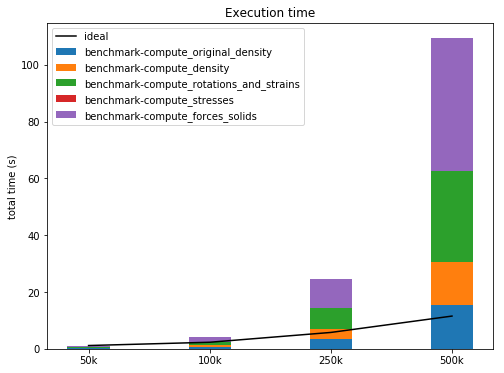

In [6]:
plots=[]

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

cum=array[0,:]

[fig, ax]=plt.subplots(1,1,figsize=(8,6))

plots.append(plt.bar(ind, cum, width, label=df.index.values[0]))

for n in range(1, len(df.index.values)):
    
    plots.append(plt.bar(ind, array[n,:], width,
             bottom=cum, label=df.index.values[n]))
    
    cum=cum+array[n,:]

x = np.array([5e4, 1e5, 2.5e5, 5e5])
y = arr[0]*x/x[0]
plt.plot(ind,y, label="ideal", color="black")

plt.ylabel('total time (s)')
plt.title('Execution time')
plt.xticks(ind, ('50k', '100k', '250k', '500k'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend()

plt.show()

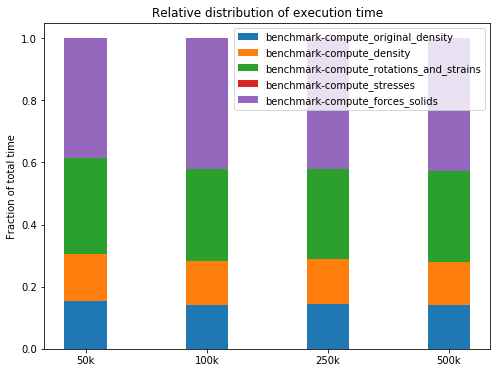

In [7]:
plots=[]

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

scale=np.sum(array, axis=0)

cum=array[0,:]/scale

[fig, ax]=plt.subplots(1,1,figsize=(8,6))

plots.append(plt.bar(ind, cum, width, label=df.index.values[0]))

for n in range(1, len(df.index.values)):
    
    plots.append(plt.bar(ind, array[n,:]/scale, width,
             bottom=cum, label=df.index.values[n]))
    
    cum=cum+array[n,:]/scale

plt.ylabel('Fraction of total time')
plt.title('Relative distribution of execution time')
plt.xticks(ind, ('50k', '100k', '250k', '500k'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend()

plt.show()

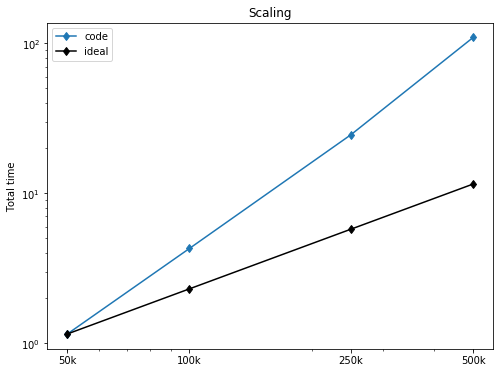

In [8]:
scale=np.sum(array, axis=0)

[fig, ax]=plt.subplots(1,1,figsize=(8,6))
    
x = np.array([5e4, 1e5, 2.5e5, 5e5])    
plt.loglog(x, scale,"-d", label="code")  
    
#plt.plot(ind)


y = arr[0]*x/x[0]
plt.loglog(x,y, "-d", label="ideal", color="black")

plt.ylabel('Total time')
plt.title('Scaling')
plt.xticks(x, ('50k', '100k', '250k', '500k'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend()

plt.show()